In [1]:
import numpy as np
import pandas as pd
import math
import warnings
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', font_scale=1.3)

In [2]:
data = pd.read_csv('sex_bmi_smokers.csv')
data

,sex,bmi,smoker
0,female,27.900,yes
1,male,33.770,no
2,male,33.000,no
3,male,22.705,no
4,male,28.880,no
...,...,...,...
1333,male,30.970,no
1334,female,31.920,no
1335,female,36.850,no
1336,female,25.800,no


In [3]:
data.groupby(['sex', 'smoker']).count()

bmi
sex    smoker     
female no      547
       yes     115
male   no      517
       yes     159

курящих мужчин 159, некурящих женщин 547

In [4]:
def sample_mean(X):
    return round(X.sum() / len(X), 2)

In [5]:
def sample_variance(X):
    sm = sample_mean(X)
    return ((X - sm) ** 2).sum() / len(X)

In [6]:
def quantile2(X, q):
    X = X.sort_values()
    
    num = (len(X) - 1) * q  # -1 for indexing in dataframe
    rounded = math.floor(num)
    if num == rounded:
        return X.iloc[rounded]
    else:
        return X.iloc[rounded] + (X.iloc[math.ceil(num)] -
                                  X.iloc[rounded]) * (num - rounded)

In [7]:
# Это действительно то, как реализована встроенная функция quantile в pandas
# с линейной интерполяцией по умолчанию 
x = data['bmi']

for q in [0.123, 0.45, 0.87]:
    print(x.quantile(q), '=', quantile2(x, q))

23.6 = 23.6
29.735 = 29.735
37.44520000000001 = 37.44520000000001


In [8]:
def show_statistics(x):
    print(f"""mean = {sample_mean(x)}
variance = {sample_variance(x)}
quant.6 = {x.quantile(0.6)}""")

print("ALL")
show_statistics(data['bmi'])

for c in data.groupby(['sex', 'smoker']):
    print("=" * 30)
    x = c[1]['bmi']
    print(c[0])
    show_statistics(x)

ALL
mean = 30.66
variance = 37.16010151345292
quant.6 = 32.032
('female', 'no')
mean = 30.54
variance = 34.76733829981718
quant.6 = 31.912
('female', 'yes')
mean = 29.61
variance = 44.020113043478254
quant.6 = 30.875999999999998
('male', 'no')
mean = 30.77
variance = 38.274625241779496
quant.6 = 32.11
('male', 'yes')
mean = 31.5
variance = 35.20384606918239
quant.6 = 33.244


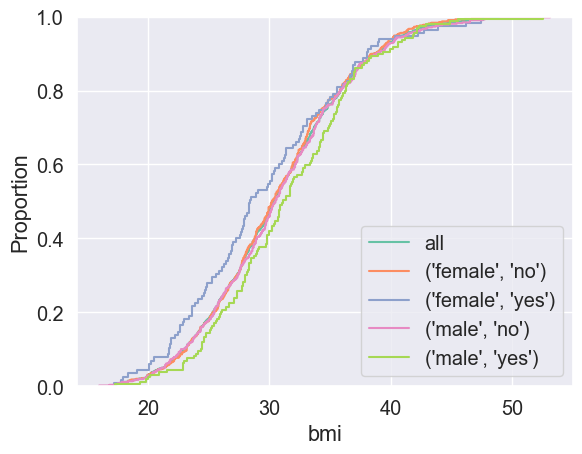

In [9]:
with warnings.catch_warnings(record=True):
    fig, ax = plt.subplots()
    cmap = sns.color_palette("Blues", n_colors=5)
    legends = ['all']
    sns.ecdfplot(data=data, x='bmi', ax=ax)
    for c in data.groupby(['sex', 'smoker']):
        x = c[1]
        sns.ecdfplot(data=x, x='bmi', ax=ax)
        legends += [c[0]]
    ax.legend(legends);

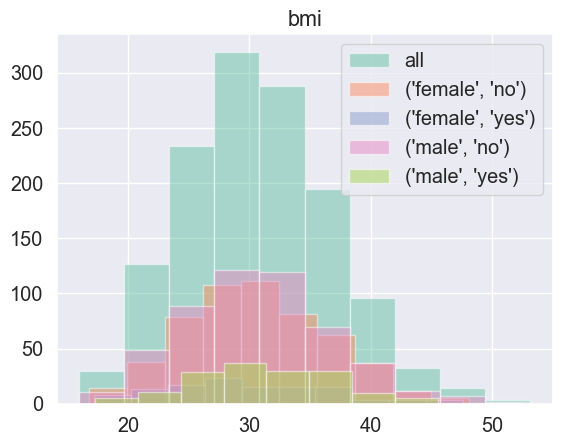

In [10]:
fig, ax = plt.subplots()
cmap = sns.color_palette("Blues", n_colors=5)
legends = ['all']
data['bmi'].hist(ax=ax, alpha=0.5)
for c in data.groupby(['sex', 'smoker']):
    x = c[1]
    x.hist(ax=ax, alpha=0.5)
    legends += [c[0]]
ax.legend(legends)

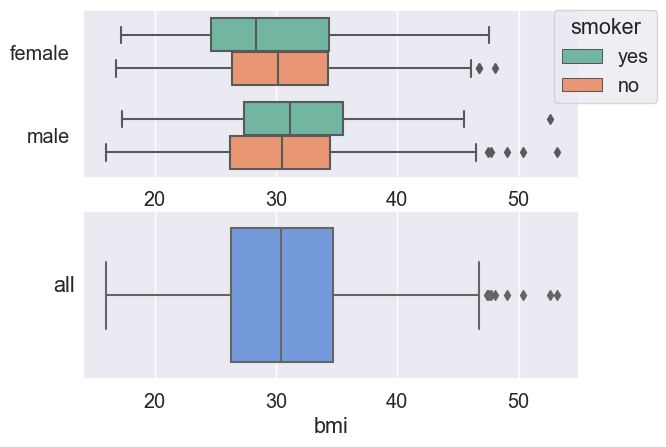

In [11]:
with warnings.catch_warnings(record=True):
    fig, ax = plt.subplots(2)
    cmap = sns.color_palette("Blues", n_colors=5)
    sns.boxplot(data=data, x="bmi", y="sex", hue="smoker", ax=ax[0])
    ax[0].set_ylabel('')
    sns.boxplot(data=data, x="bmi", ax=ax[1], color="cornflowerblue")
    ax[1].set_ylabel('all')
    ax[1].set_ylabel(ylabel=ax[1].get_ylabel(), rotation=0)
    ax[0].legend(bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=0, title='smoker')